<a href="https://colab.research.google.com/github/jassiG/StockPredictor/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install yfinance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

%matplotlib inline

In [107]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [108]:
# Here we are importing the data from the Yahoo finance api
tech_list = ['NFLX', 'GOOG', 'TSLA', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [NFLX, GOOG, TSLA, AMZN]
company_name = ["NETFLIX", "GOOGLE", "TESLA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [109]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-28,2843.560059,2918.750000,2806.000000,2891.929932,2891.929932,5865800,AMAZON
2022-04-29,2596.979980,2615.219971,2432.500000,2485.629883,2485.629883,13616500,AMAZON
2022-05-02,2448.020020,2493.360107,2367.500000,2490.000000,2490.000000,7439400,AMAZON
2022-05-03,2481.070068,2524.409912,2456.500000,2485.070068,2485.070068,3952000,AMAZON
2022-05-04,2472.000000,2474.709961,2383.659912,2404.000000,2404.000000,1112703,AMAZON


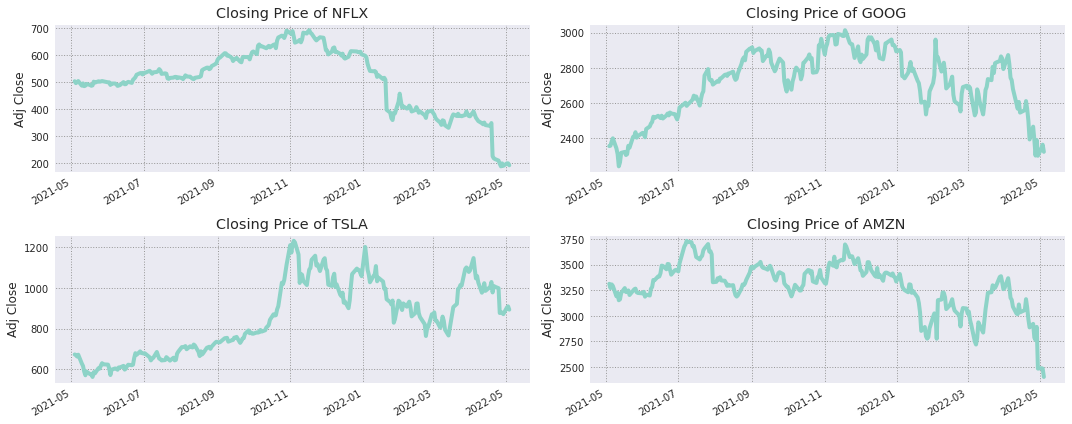

In [110]:
# Now we will look at the historical value of all these prices.

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

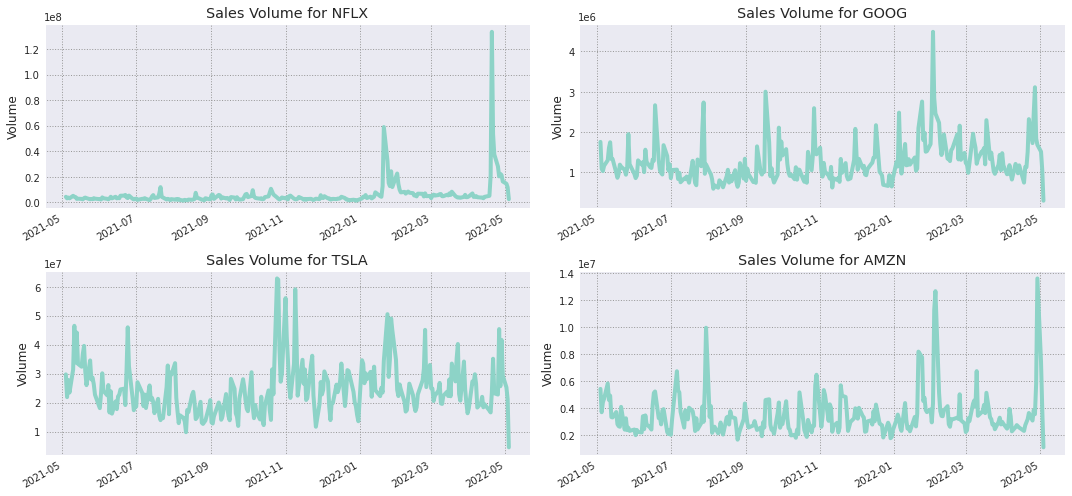

In [111]:
# plot the total volume of stocks which are being traded every day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [112]:
ma_day = [7, 30]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

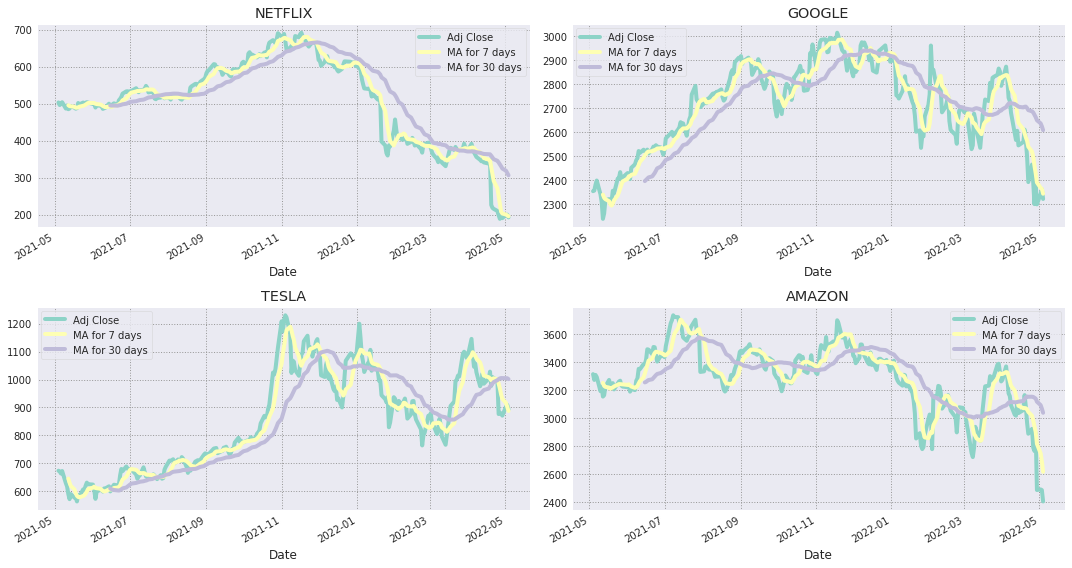

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)



NFLX[['Adj Close', 'MA for 7 days', 'MA for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NETFLIX')

GOOG[['Adj Close', 'MA for 7 days', 'MA for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 7 days', 'MA for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

AMZN[['Adj Close', 'MA for 7 days', 'MA for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

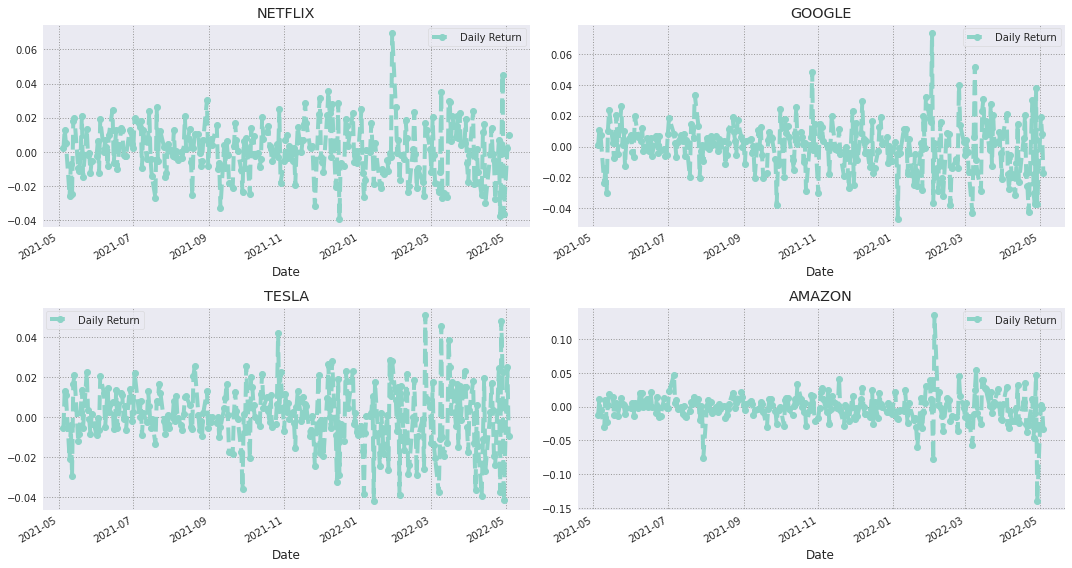

In [114]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NETFLIX')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

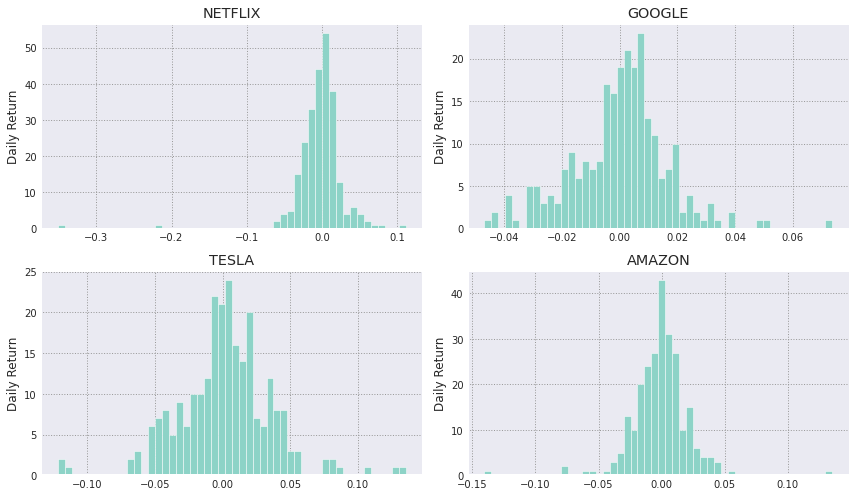

In [115]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [116]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,NFLX,GOOG,TSLA,AMZN
Date,,,,
2021-05-04,503.179993,2354.250000,673.599976,3311.870117
2021-05-05,496.079987,2356.739990,670.940002,3270.540039
2021-05-06,499.549988,2381.350098,663.539978,3306.370117
2021-05-07,503.839996,2398.689941,672.369995,3291.610107
2021-05-10,486.690002,2341.659912,629.039978,3190.489990


In [117]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,NFLX,GOOG,TSLA,AMZN
Date,,,,
2021-05-04,NaN,NaN,NaN,NaN
2021-05-05,-0.014110,0.001058,-0.003949,-0.012479
2021-05-06,0.006995,0.010442,-0.011029,0.010955
2021-05-07,0.008588,0.007282,0.013307,-0.004464
2021-05-10,-0.034039,-0.023775,-0.064444,-0.030721


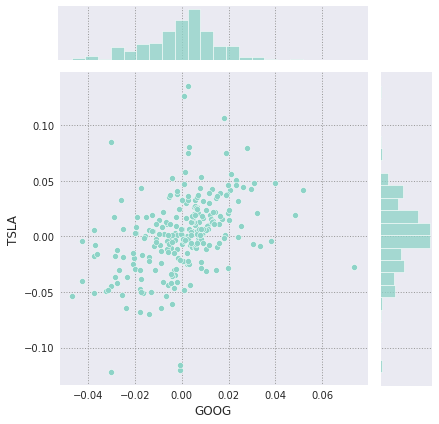

In [118]:
# Comparing TESLA with GOOGLE
sns.jointplot(x='GOOG', y='TSLA', data=tech_rets, kind='scatter')

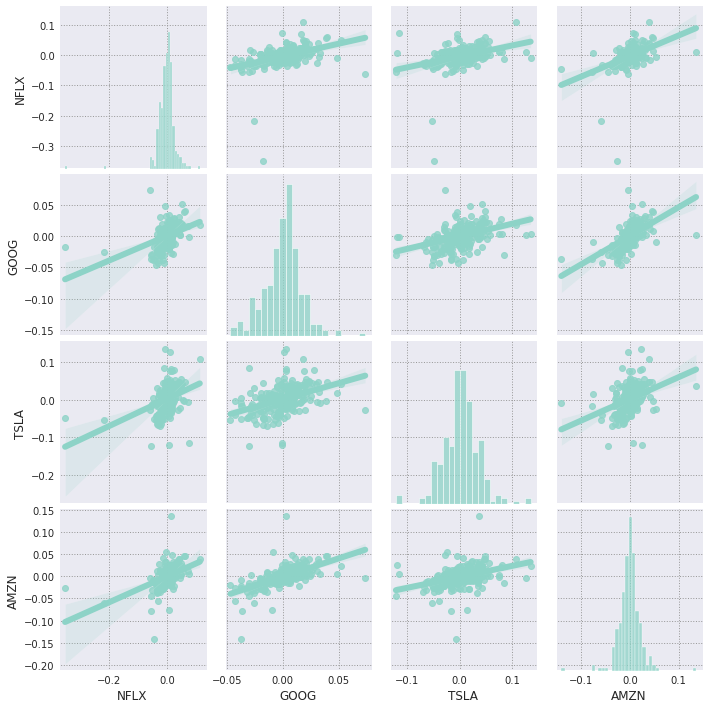

In [119]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

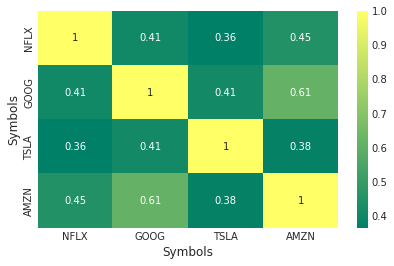

In [120]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

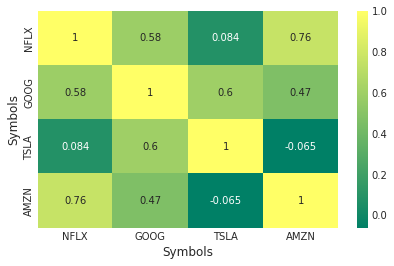

In [121]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

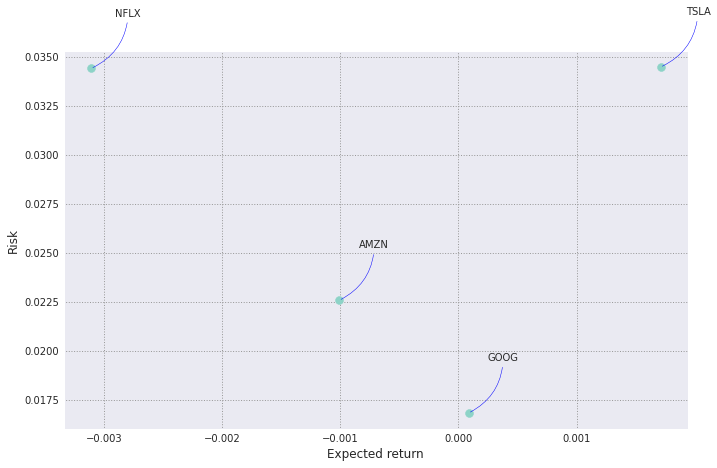

In [122]:
# making a clenaed version of the original DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [123]:
df = DataReader('NFLX', data_source='yahoo', start='2012-01-01', end=datetime.now())
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714


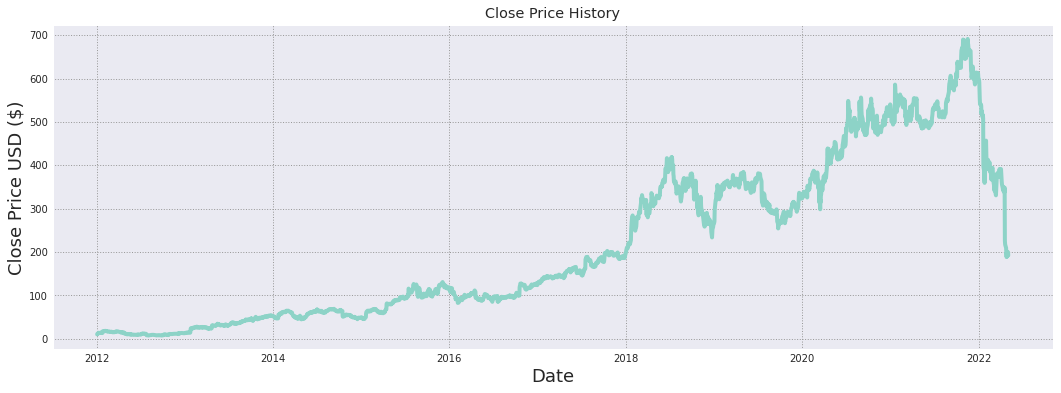

In [124]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [125]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2472

In [126]:
# Let's Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.00385127]
 [0.00556596]
 [0.00532578]
 ...
 [0.28037002]
 [0.28096941]
 [0.26998995]]


In [127]:
# Create the training, and scaled data set 
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [128]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build and compile the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2412/2412 [==============================] - 48s 18ms/step - loss: 0.0013
Epoch 2/5
2412/2412 [==============================] - 45s 19ms/step - loss: 5.2943e-04
Epoch 3/5
2412/2412 [==============================] - 45s 18ms/step - loss: 3.7590e-04
Epoch 4/5
2412/2412 [==============================] - 45s 19ms/step - loss: 3.6320e-04
Epoch 5/5
2412/2412 [==============================] - 44s 18ms/step - loss: 3.0301e-04


In [129]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18.754284587852663

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


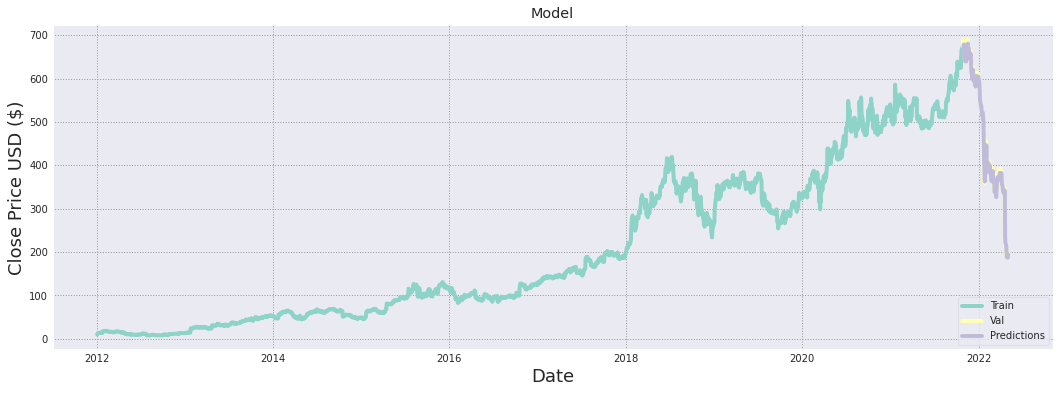

In [130]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [131]:
valid

,Close,Predictions
Date,,
2021-10-28,674.049988,653.413330
2021-10-29,690.309998,664.206116
2021-11-01,681.169983,678.728149
2021-11-02,677.719971,670.061951
2021-11-03,688.289978,668.376282
...,...,...
2022-04-28,199.520004,188.128647
2022-04-29,190.360001,195.628799
2022-05-02,199.460007,187.310623
